## 4-2. 한글 텍스트 분류

In [1]:
# 네이버 영화 리뷰 감정 분석
# 파일 다운로드 : https://github.com/e9t/nsmc

# rating.txt : 전체 리뷰를 모아둔 데이터(20만 개)
# ratings_train.txt : 학습 데이터(15만 개)
# ratings_test.txt : 평가 데이터(5만개)

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
DATA_IN_PATH = './nsmc-master/data_in/'
print("File Size : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

File Size : 
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


In [4]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
print('전체 학습 데이터의 개수 : {}'.format(len(train_data)))

전체 학습 데이터의 개수 : 150000


In [6]:
# 리뷰 길이
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

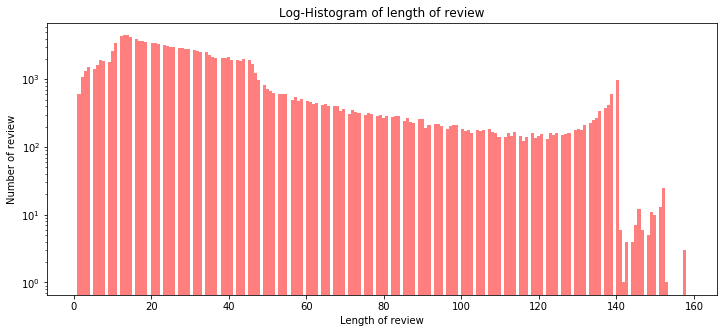

In [7]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [8]:
print('리뷰 길이 최댓값 : {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값 : {}'.format(np.min(train_length)))
print('리뷰 길이 평균값 : {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차 : {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값 : {}'.format(np.median(train_length)))

print('리뷰 길이 제 1사분위 : {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3사분위 : {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값 : 158
리뷰 길이 최솟값 : 1
리뷰 길이 평균값 : 35.24
리뷰 길이 표준편차 : 29.58
리뷰 길이 중간값 : 27.0
리뷰 길이 제 1사분위 : 16.0
리뷰 길이 제 3사분위 : 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x11e9ce9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x11e9b8128>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e9ce898>],
 'medians': [<matplotlib.lines.Line2D at 0x11e9b87b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e9b8e10>],
 'means': [<matplotlib.lines.Line2D at 0x11e9b8b00>]}

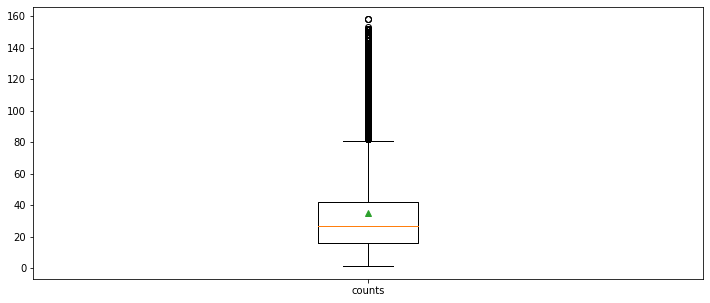

In [9]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [10]:
train_review = [review for review in train_data['document'] if type(review) is str]

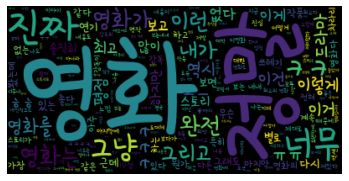

In [14]:
wordcloud = WordCloud(font_path=DATA_IN_PATH+'SDMiSaeng.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

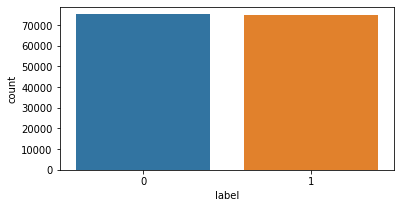

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [16]:
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


Text(0, 0.5, 'Number of reviews')

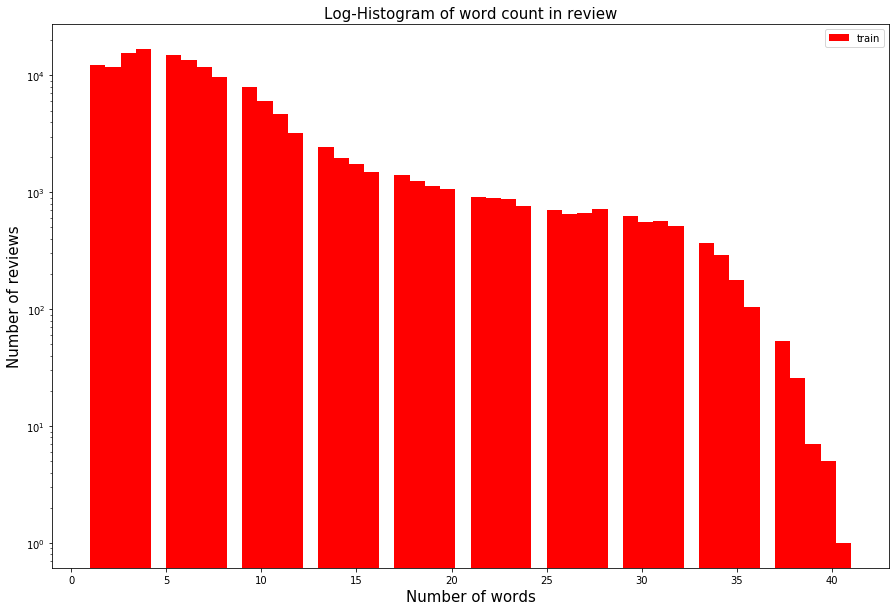

In [17]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [18]:
print('리뷰 단어 개수 최댓값 : {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값 : {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값 : {}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차 : {}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값 : {}'.format(np.median(train_word_counts)))

print('리뷰 단어 개수 제1사분위 : {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위 : {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값 : 41
리뷰 단어 개수 최솟값 : 1
리뷰 단어 개수 평균값 : 7.58494
리뷰 단어 개수 표준편차 : 6.514041131514803
리뷰 단어 개수 중간값 : 6.0
리뷰 단어 개수 제1사분위 : 3.0
리뷰 단어 개수 제3사분위 : 9.0


In [19]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표

print('물음표가 있는 질문: {:.2f}%'.format(qmarks*100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))

물음표가 있는 질문: 8.25%
마침표가 있는 질문: 51.76%


In [5]:
# Preprocessing
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

DATA_IN_PATH = './nsmc-master/data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3)
train_data['document'][:5] # == train_data['document'].head()

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

*한글을 전처리하는 과정에서는 Beautiful Soup 라이브러리를 이용한 태그 제거는 따로 하지 않는다.*

In [10]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [11]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True) # 텍스트를 형태소 단위로 나눈다.
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [12]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

In [13]:
def preprocessing(review, okt, remove_stopwords = False, stop_words=[]):
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # removew_stopwords : 불용어를 제거할지 여부 선택, 기본값은 False
    # stop_words : 불용어 사전은 사용자가 직접 입력해야 함. 기본값은 빈 리스트
    
    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해 형태소 단위로 나눈다
    word_review = okt.morphs(review_text, stem=True)
    
    # 3. stop word(선택적)
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    
    return word_review

In [14]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_train_review.append([]) # string이 아니면 비어있는 값 추가

clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [15]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3)

clean_test_review = []

for review in test_data['document']:
    # 빈 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_review.append([]) # string이 아니면 비어있는 값 추가

clean_test_review[:4]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태

MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # train data 벡터화
train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # test data 벡터화
test_labels = np.array(test_data['label'])

In [17]:
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

import os

DATA_OUT_PATH = './nsmc-master/data_out/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
np.save(open(DATA_OUT_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_OUT_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_OUT_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_OUT_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# data 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_OUT_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [1]:
# modeling
import os
from datetime import datetime
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import json
from sklearn.model_selection import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
DATA_IN_PATH = './nsmc-master/data_in/'
DATA_OUT_PATH = './nsmc-master/data_out/'
INPUT_TRAIN_DATA_FILE_NAME = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA_FILE_NAME = 'nsmc_train_label.npy'
DATA_CONFIGS_FILE_NAME = 'data_configs.json'

input_data = np.load(open(DATA_OUT_PATH + INPUT_TRAIN_DATA_FILE_NAME, 'rb'))
label_data = np.load(open(DATA_OUT_PATH + LABEL_TRAIN_DATA_FILE_NAME, 'rb'))
prepro_configs = json.load(open(DATA_OUT_PATH + DATA_CONFIGS_FILE_NAME, 'r'))

In [3]:
TEST_SPLIT = 0.1
RNG_SEED = 13371447

input_train, input_test, label_train, label_test = train_test_split(input_data, label_data, test_size=TEST_SPLIT, random_state=RNG_SEED)

In [8]:
#데이터 입력합수
def mapping_fn(X, Y):
    input, label = {'x':X}, Y
    return input, label

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_train, label_train))
    dataset = dataset.shuffle(buffer_size=len(input_train))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)
    dataset = dataset.repeat(count=NUM_EPOCHS)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_test, label_test))
    dataset = dataset.shuffle(buffer_size=len(input_test))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

In [43]:
BATCH_SIZE = 16
NUM_EPOCHS = 10
VOCAB_SIZE = prepro_configs['vocab_size']
EMB_SIZE = 128

In [52]:
# model function (=CNN)
def model_fn(features, labels, mode, params):
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    embedding_layer = tf.keras.layers.Embedding(VOCAB_SIZE, EMB_SIZE)(features['x'])
    
    dropout_emb = tf.keras.layers.Dropout(rate=0.2)(embedding_layer)
    
    conv = tf.keras.layers.conv1D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu)(dropout_emb)
    pool = tf.keras.layers.GlobalMaxPool1D()(conv)
    
    hidden = tf.keras.layers.Dense(units=250, activation=tf.nn.relu)(pool)
    
    dropout_hidden = tf.keras.layers.Dropout(rate=0.2, training=TRAIN)(hidden)
    logits = tf.keras.layers.Dense(units=1)(dropout_hidden)
    
    if labels is not None:
        labels = tf.reshape(labels, [-1, 1])
        
    if TRAIN:
        global_step = tf.train.get_global_step()
        loss = tf.losses.sigmoid_cross_entropy(labels, logits)
        train_op = tf.train.AdamOptimizer(0.001).minimize(loss, global_step)
        return tf.estimator.EstimatorSpec(mode=mode, train_op=train_op, loss=loss)
    elif EVAL:
        loss = tf.losses.sigmoid_cross_entropy(labels, logits)
        pred = tf.nn.sigmoid(logits)
        accuracy = tf.metrics.accuracy(labels, tf.round(pred))
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops={'acc':accuracy})
    elif PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions={'prob':tf.nn.sigmoid(logits)})

cross_entropy : 예측값과 실제값 사이의 확률 분포 차이를 계산한 값

In [45]:
# model training
est = tf.estimator.Estimator(model_fn, model_dir="data_out/checkpoint/cnn_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'data_out/checkpoint/cnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x139458d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
time_start = datetime.utcnow()
print('Experiment started at {}'.format(time_start.strftime("%H:%M:%S")))
print('................................')

est.train(train_input_fn)

time_end = datetime.utcnow()
print("..................................")
print("Experiment finished at {}".format(time_end.strftime("%H:%M:%S")))
print("")
time_elapsed = time_end - time_start
print("Experiment elapsed time: {} seconds".format(time_elapsed.total_seconds()))

Experiment started at 05:09:10
................................
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data_out/checkpoint/cnn_model/model.ckpt-69239
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 69239 into data_out/checkpoint/cnn_model/model.ckpt.
INFO:tensorflow:loss = 0.039577793, step = 69240
INFO:tensorflow:global_step/sec: 26.7315
INFO:tensorflow:loss = 0.04886138, step = 69340 (3.742 sec)
INFO:tensorflow:global_step/sec: 27.5111
INFO:tensorflow:loss = 0.009249267, step = 69440 (3.635 sec)
INFO:tensorflow:global_step/sec: 26.0799
INFO:tensorflow:loss = 0.05146006, step = 69540 (3.834 sec)
INFO:tensorflow:global_step/sec: 31.1601
INFO:tensorflow:loss = 0.063470125, step = 69640 (3.20

INFO:tensorflow:global_step/sec: 31.8872
INFO:tensorflow:loss = 0.015674515, step = 76540 (3.136 sec)
INFO:tensorflow:global_step/sec: 31.7696
INFO:tensorflow:loss = 0.100735016, step = 76640 (3.148 sec)
INFO:tensorflow:global_step/sec: 31.9601
INFO:tensorflow:loss = 0.011122176, step = 76740 (3.129 sec)
INFO:tensorflow:global_step/sec: 32.1446
INFO:tensorflow:loss = 0.08446569, step = 76840 (3.111 sec)
INFO:tensorflow:global_step/sec: 31.7967
INFO:tensorflow:loss = 0.045629233, step = 76940 (3.145 sec)
INFO:tensorflow:global_step/sec: 31.9937
INFO:tensorflow:loss = 0.08815068, step = 77040 (3.126 sec)
INFO:tensorflow:global_step/sec: 32.1781
INFO:tensorflow:loss = 0.28690085, step = 77140 (3.108 sec)
INFO:tensorflow:global_step/sec: 32.1284
INFO:tensorflow:loss = 0.016346015, step = 77240 (3.112 sec)
INFO:tensorflow:global_step/sec: 30.8031
INFO:tensorflow:loss = 0.000854845, step = 77340 (3.246 sec)
INFO:tensorflow:global_step/sec: 29.8784
INFO:tensorflow:loss = 0.0034057358, step = 

INFO:tensorflow:loss = 0.011679042, step = 84540 (3.124 sec)
INFO:tensorflow:global_step/sec: 31.9693
INFO:tensorflow:loss = 0.024462575, step = 84640 (3.128 sec)
INFO:tensorflow:global_step/sec: 32.1397
INFO:tensorflow:loss = 0.0065647895, step = 84740 (3.111 sec)
INFO:tensorflow:global_step/sec: 32.1644
INFO:tensorflow:loss = 0.042874303, step = 84840 (3.109 sec)
INFO:tensorflow:global_step/sec: 32.3106
INFO:tensorflow:loss = 0.014236648, step = 84940 (3.095 sec)
INFO:tensorflow:global_step/sec: 32.0302
INFO:tensorflow:loss = 0.051424593, step = 85040 (3.122 sec)
INFO:tensorflow:global_step/sec: 32.0725
INFO:tensorflow:loss = 0.00018619373, step = 85140 (3.118 sec)
INFO:tensorflow:global_step/sec: 31.9867
INFO:tensorflow:loss = 0.00035171545, step = 85240 (3.126 sec)
INFO:tensorflow:global_step/sec: 32.1871
INFO:tensorflow:loss = 0.029570183, step = 85340 (3.107 sec)
INFO:tensorflow:global_step/sec: 32.0675
INFO:tensorflow:loss = 0.05572981, step = 85440 (3.118 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 32.0957
INFO:tensorflow:loss = 0.008294672, step = 92240 (3.115 sec)
INFO:tensorflow:global_step/sec: 32.2339
INFO:tensorflow:loss = 0.065525495, step = 92340 (3.103 sec)
INFO:tensorflow:global_step/sec: 32.205
INFO:tensorflow:loss = 0.079340585, step = 92440 (3.105 sec)
INFO:tensorflow:global_step/sec: 32.2134
INFO:tensorflow:loss = 0.0039942553, step = 92540 (3.104 sec)
INFO:tensorflow:global_step/sec: 32.1144
INFO:tensorflow:loss = 0.026365813, step = 92640 (3.114 sec)
INFO:tensorflow:global_step/sec: 32.0548
INFO:tensorflow:loss = 0.04790393, step = 92740 (3.120 sec)
INFO:tensorflow:global_step/sec: 31.9911
INFO:tensorflow:loss = 0.032482825, step = 92840 (3.126 sec)
INFO:tensorflow:global_step/sec: 32.1306
INFO:tensorflow:loss = 0.20430166, step = 92940 (3.112 sec)
INFO:tensorflow:global_step/sec: 32.1595
INFO:tensorflow:loss = 0.19698185, step = 93040 (3.109 sec)
INFO:tensorflow:global_step/sec: 32.0117
INFO:tensorflow:loss = 0.0063902205, step = 

INFO:tensorflow:loss = 0.00018509151, step = 100240 (3.357 sec)
INFO:tensorflow:global_step/sec: 30.2147
INFO:tensorflow:loss = 0.015892431, step = 100340 (3.310 sec)
INFO:tensorflow:global_step/sec: 31.948
INFO:tensorflow:loss = 0.0060988413, step = 100440 (3.130 sec)
INFO:tensorflow:global_step/sec: 31.8753
INFO:tensorflow:loss = 0.00090167555, step = 100540 (3.137 sec)
INFO:tensorflow:global_step/sec: 31.9872
INFO:tensorflow:loss = 0.011335453, step = 100640 (3.126 sec)
INFO:tensorflow:global_step/sec: 32.0394
INFO:tensorflow:loss = 0.00031665538, step = 100740 (3.121 sec)
INFO:tensorflow:global_step/sec: 32.0134
INFO:tensorflow:loss = 0.013883337, step = 100840 (3.124 sec)
INFO:tensorflow:global_step/sec: 32.1938
INFO:tensorflow:loss = 0.00013547554, step = 100940 (3.106 sec)
INFO:tensorflow:global_step/sec: 32.3547
INFO:tensorflow:loss = 0.033846553, step = 101040 (3.091 sec)
INFO:tensorflow:global_step/sec: 32.2508
INFO:tensorflow:loss = 0.041814413, step = 101140 (3.101 sec)
INF

INFO:tensorflow:global_step/sec: 32.1768
INFO:tensorflow:loss = 0.0021112305, step = 108140 (3.108 sec)
INFO:tensorflow:global_step/sec: 32.374
INFO:tensorflow:loss = 0.008825211, step = 108240 (3.089 sec)
INFO:tensorflow:global_step/sec: 32.3933
INFO:tensorflow:loss = 0.007826431, step = 108340 (3.087 sec)
INFO:tensorflow:global_step/sec: 32.3291
INFO:tensorflow:loss = 0.00011160912, step = 108440 (3.093 sec)
INFO:tensorflow:global_step/sec: 32.3658
INFO:tensorflow:loss = 0.040186234, step = 108540 (3.090 sec)
INFO:tensorflow:global_step/sec: 32.4968
INFO:tensorflow:loss = 0.028908072, step = 108640 (3.077 sec)
INFO:tensorflow:global_step/sec: 32.5096
INFO:tensorflow:loss = 0.011326076, step = 108740 (3.076 sec)
INFO:tensorflow:global_step/sec: 32.3251
INFO:tensorflow:loss = 0.006517331, step = 108840 (3.094 sec)
INFO:tensorflow:global_step/sec: 32.4679
INFO:tensorflow:loss = 0.0008964031, step = 108940 (3.080 sec)
INFO:tensorflow:global_step/sec: 32.3077
INFO:tensorflow:loss = 0.1329

INFO:tensorflow:loss = 0.03682122, step = 116040 (3.112 sec)
INFO:tensorflow:global_step/sec: 32.2071
INFO:tensorflow:loss = 0.0028069953, step = 116140 (3.105 sec)
INFO:tensorflow:global_step/sec: 32.2436
INFO:tensorflow:loss = 0.044730183, step = 116240 (3.101 sec)
INFO:tensorflow:global_step/sec: 32.3792
INFO:tensorflow:loss = 0.00013455197, step = 116340 (3.088 sec)
INFO:tensorflow:global_step/sec: 32.1829
INFO:tensorflow:loss = 0.04552878, step = 116440 (3.107 sec)
INFO:tensorflow:global_step/sec: 32.2316
INFO:tensorflow:loss = 0.029379278, step = 116540 (3.103 sec)
INFO:tensorflow:global_step/sec: 32.305
INFO:tensorflow:loss = 0.07672991, step = 116640 (3.095 sec)
INFO:tensorflow:global_step/sec: 31.8916
INFO:tensorflow:loss = 0.044907786, step = 116740 (3.136 sec)
INFO:tensorflow:global_step/sec: 32.1022
INFO:tensorflow:loss = 0.08376048, step = 116840 (3.115 sec)
INFO:tensorflow:global_step/sec: 29.5461
INFO:tensorflow:loss = 0.00893411, step = 116940 (3.385 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 31.8662
INFO:tensorflow:loss = 0.026347142, step = 124040 (3.138 sec)
INFO:tensorflow:global_step/sec: 32.2772
INFO:tensorflow:loss = 0.014344376, step = 124140 (3.098 sec)
INFO:tensorflow:global_step/sec: 31.9861
INFO:tensorflow:loss = 0.00024489404, step = 124240 (3.126 sec)
INFO:tensorflow:global_step/sec: 31.9349
INFO:tensorflow:loss = 8.385442e-05, step = 124340 (3.131 sec)
INFO:tensorflow:global_step/sec: 32.1066
INFO:tensorflow:loss = 0.00032841682, step = 124440 (3.115 sec)
INFO:tensorflow:global_step/sec: 32.1255
INFO:tensorflow:loss = 7.1091796e-05, step = 124540 (3.113 sec)
INFO:tensorflow:global_step/sec: 30.9725
INFO:tensorflow:loss = 0.0564016, step = 124640 (3.229 sec)
INFO:tensorflow:global_step/sec: 30.8463
INFO:tensorflow:loss = 1.3592096e-05, step = 124740 (3.242 sec)
INFO:tensorflow:global_step/sec: 32.072
INFO:tensorflow:loss = 0.047761004, step = 124840 (3.118 sec)
INFO:tensorflow:global_step/sec: 31.6165
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.008580223, step = 131840 (3.124 sec)
INFO:tensorflow:global_step/sec: 31.9939
INFO:tensorflow:loss = 0.030734433, step = 131940 (3.126 sec)
INFO:tensorflow:global_step/sec: 32.0211
INFO:tensorflow:loss = 0.042496912, step = 132040 (3.123 sec)
INFO:tensorflow:global_step/sec: 32.0147
INFO:tensorflow:loss = 0.002533067, step = 132140 (3.124 sec)
INFO:tensorflow:global_step/sec: 32.4011
INFO:tensorflow:loss = 0.013730786, step = 132240 (3.086 sec)
INFO:tensorflow:global_step/sec: 31.4907
INFO:tensorflow:loss = 0.000711481, step = 132340 (3.176 sec)
INFO:tensorflow:global_step/sec: 31.4579
INFO:tensorflow:loss = 0.0014481852, step = 132440 (3.179 sec)
INFO:tensorflow:global_step/sec: 32.1847
INFO:tensorflow:loss = 0.0029372058, step = 132540 (3.107 sec)
INFO:tensorflow:global_step/sec: 32.2158
INFO:tensorflow:loss = 0.0005387357, step = 132640 (3.104 sec)
INFO:tensorflow:global_step/sec: 32.2242
INFO:tensorflow:loss = 0.06259093, step = 132740 (3.103 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 32.0665
INFO:tensorflow:loss = 0.17364664, step = 139840 (3.119 sec)
INFO:tensorflow:global_step/sec: 31.5055
INFO:tensorflow:loss = 0.017059816, step = 139940 (3.174 sec)
INFO:tensorflow:global_step/sec: 31.5155
INFO:tensorflow:loss = 0.055363905, step = 140040 (3.173 sec)
INFO:tensorflow:global_step/sec: 32.2752
INFO:tensorflow:loss = 0.08862634, step = 140140 (3.098 sec)
INFO:tensorflow:global_step/sec: 32.075
INFO:tensorflow:loss = 0.011954637, step = 140240 (3.118 sec)
INFO:tensorflow:global_step/sec: 32.1795
INFO:tensorflow:loss = 0.0010675355, step = 140340 (3.108 sec)
INFO:tensorflow:global_step/sec: 32.3724
INFO:tensorflow:loss = 0.00029915472, step = 140440 (3.089 sec)
INFO:tensorflow:global_step/sec: 32.4287
INFO:tensorflow:loss = 0.004195053, step = 140540 (3.084 sec)
INFO:tensorflow:global_step/sec: 32.1536
INFO:tensorflow:loss = 0.04127352, step = 140640 (3.110 sec)
INFO:tensorflow:global_step/sec: 32.2788
INFO:tensorflow:loss = 0.19743271

INFO:tensorflow:loss = 0.066607475, step = 147640 (3.187 sec)
INFO:tensorflow:global_step/sec: 30.2908
INFO:tensorflow:loss = 0.00031046665, step = 147740 (3.301 sec)
INFO:tensorflow:global_step/sec: 32.1181
INFO:tensorflow:loss = 0.0006422156, step = 147840 (3.114 sec)
INFO:tensorflow:global_step/sec: 31.6836
INFO:tensorflow:loss = 0.030607305, step = 147940 (3.156 sec)
INFO:tensorflow:global_step/sec: 31.7167
INFO:tensorflow:loss = 0.00028802565, step = 148040 (3.153 sec)
INFO:tensorflow:global_step/sec: 31.9933
INFO:tensorflow:loss = 0.00036615963, step = 148140 (3.126 sec)
INFO:tensorflow:global_step/sec: 31.8581
INFO:tensorflow:loss = 0.015445943, step = 148240 (3.139 sec)
INFO:tensorflow:global_step/sec: 31.8127
INFO:tensorflow:loss = 0.0016849404, step = 148340 (3.144 sec)
INFO:tensorflow:global_step/sec: 31.9
INFO:tensorflow:loss = 0.026869867, step = 148440 (3.135 sec)
INFO:tensorflow:global_step/sec: 31.818
INFO:tensorflow:loss = 2.382018e-05, step = 148540 (3.143 sec)
INFO:t

In [48]:
valid = est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-29T15:13:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data_out/checkpoint/cnn_model/model.ckpt-153619
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-29-15:13:08
INFO:tensorflow:Saving dict for global step 153619: acc = 0.7938667, global_step = 153619, loss = 1.5191383
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 153619: data_out/checkpoint/cnn_model/model.ckpt-153619


In [49]:
INPUT_TEST_DATA_FILE_NAME = 'nsmc_test_input.npy'
LABEL_TEST_DATA_FILE_NAME = 'nsmc_test_label.npy'

test_input_data = np.load(open(DATA_OUT_PATH + INPUT_TEST_DATA_FILE_NAME, 'rb'))
test_label_data = np.load(open(DATA_OUT_PATH + LABEL_TEST_DATA_FILE_NAME, 'rb'))

In [50]:
def test_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((test_input_data, test_label_data))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

In [51]:
predict = est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-29T15:14:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data_out/checkpoint/cnn_model/model.ckpt-153619
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-29-15:14:36
INFO:tensorflow:Saving dict for global step 153619: acc = 0.79768, global_step = 153619, loss = 1.5529486
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 153619: data_out/checkpoint/cnn_model/model.ckpt-153619
